In [1]:
# Import libraries needed to execute the code
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from IPython.display import display, HTML
from scipy.stats import spearmanr, chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import andrews_curves, parallel_coordinates, lag_plot, autocorrelation_plot, radviz

In [2]:
# Import the clean data
data = pd.read_csv('source/data.csv', low_memory=False)

In [4]:
data = data.astype({
    'AccID': 'object',
    'vehicleID': 'object',
    'num_veh': 'object',
    'birth_year': 'int64',
    'age': 'int64',  
})

In [5]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [6]:
# Initialize PCA, you can specify the number of components or retain a percentage of variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

# Convert the results back to a DataFrame
pca_data = pd.DataFrame(data=principal_components)

In [7]:
print(pca.explained_variance_ratio_)  # To see the variance captured by each component
print(pca_data.head())  # To see the reduced dataset


[0.07221522 0.06093366 0.05601693 0.04814855 0.04077854 0.03675238
 0.03451906 0.03356464 0.03270806 0.03100457 0.02956693 0.02902399
 0.02816026 0.02788408 0.02763715 0.02728382 0.0271917  0.02641855
 0.02592135 0.02540361 0.02508735 0.0245525  0.02335615 0.02238565
 0.02175641 0.02169915 0.02110887 0.02029279 0.01973921 0.01837613
 0.01679889]
         0         1         2         3         4         5         6   \
0 -1.679016  3.889533 -0.586049 -2.357273 -2.194157 -0.043277 -0.000589   
1 -2.583967  3.355766 -0.230472 -1.412498 -2.339993 -0.073661 -0.091093   
2 -3.279313  2.355717  1.713184 -0.227243 -3.058698 -0.333678 -0.579376   
3  0.219633  3.092734  0.769123  1.879157  1.979049  0.039407  1.257148   
4 -3.060376  3.393274 -0.223568 -0.744088 -1.261358 -0.083531 -0.117046   

         7         8         9   ...        21        22        23        24  \
0  2.109990 -0.823787 -2.419499  ...  1.052889  1.635128 -0.645426  0.344385   
1  1.983627 -0.279394 -2.539190  ...  1.6

In [8]:
pca_data.shape[0]

447670

In [9]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,day,month,year,time,lum,atm_condition,collision_type,lat,long,route_category,...,manv,motor,seat,user_category,gravity,gender,birth_year,reason_travel,safety_equipment1,age
day,1.000000,-0.019495,-0.001372,0.011349,-0.005330,-0.015090,-0.004566,0.000332,-0.001373,-0.000364,...,-0.000638,0.002812,-0.002379,-0.001114,-0.000163,0.000021,0.001900,0.008872,0.000844,-0.002021
month,-0.019495,1.000000,-0.005989,0.000301,0.076060,0.029546,-0.009977,0.003788,-0.014650,-0.014209,...,-0.010848,0.002687,-0.002356,-0.000017,0.000522,0.004202,0.009516,-0.013261,-0.012234,-0.009837
year,-0.001372,-0.005989,1.000000,0.000008,-0.009315,-0.007892,-0.027263,0.008702,-0.004881,0.021062,...,-0.013095,0.046255,-0.015453,-0.016211,-0.007577,-0.003658,0.068348,-0.005542,-0.043528,-0.008495
time,0.011349,0.000301,0.000008,1.000000,0.039750,-0.034469,-0.055577,0.014562,-0.007329,0.021166,...,0.006604,-0.004890,-0.004795,-0.001057,-0.018462,0.014747,0.014804,0.025184,-0.012399,-0.015001
lum,-0.005330,0.076060,-0.009315,0.039750,1.000000,0.009718,0.048345,0.037132,0.015274,0.045636,...,-0.001772,-0.038040,0.010435,0.035082,0.030922,-0.050790,0.136984,0.014231,0.031851,-0.137798
atm_condition,-0.015090,0.029546,-0.007892,-0.034469,0.009718,1.000000,0.027565,0.044998,-0.015584,-0.001127,...,-0.001756,-0.003381,0.025760,0.022090,0.001014,0.013566,-0.014967,-0.003309,-0.000133,0.014542
collision_type,-0.004566,-0.009977,-0.027263,-0.055577,0.048345,0.027565,1.000000,0.036920,-0.013744,0.042843,...,-0.004182,-0.014536,0.300898,0.267549,0.063093,0.019871,-0.017410,0.038049,0.034187,0.016024
lat,0.000332,0.003788,0.008702,0.014562,0.037132,0.044998,0.036920,1.000000,-0.237048,-0.040402,...,0.019486,0.039768,0.014564,0.005721,-0.000845,-0.022333,0.037450,-0.015003,0.005268,-0.036948
long,-0.001373,-0.014650,-0.004881,-0.007329,0.015274,-0.015584,-0.013744,-0.237048,1.000000,0.044197,...,0.008999,-0.026166,0.014764,0.017854,0.004044,-0.016554,0.003148,-0.043112,0.020191,-0.003482
route_category,-0.000364,-0.014209,0.021062,0.021166,0.045636,-0.001127,0.042843,-0.040402,0.044197,1.000000,...,0.086778,0.081507,0.095016,0.074057,0.002846,0.007074,-0.010543,0.009662,0.086136,0.011624


In [10]:
# Set a threshold for identifying highly correlated features
threshold = 0.9

# Find pairs of features with a correlation higher than the threshold
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(f"Highly correlated features: {correlated_features}")


Highly correlated features: {'user_category', 'age'}


In [11]:
data_reduced = data.drop(columns=correlated_features)
print(data_reduced.head())


          AccID  day  month  year      time  lum  atm_condition  \
0  201900000001   30     11  2019   5400000    4              1   
1  201900000001   30     11  2019   5400000    4              1   
2  201900000001   30     11  2019   5400000    4              1   
3  201900000002   30     11  2019  10200000    3              1   
4  201900000003   28     11  2019  54900000    1              1   

   collision_type        lat      long  ...  mobile_obstacle  \
0               2  48.896210  2.470120  ...                2   
1               2  48.896210  2.470120  ...                2   
2               2  48.896210  2.470120  ...                0   
3               6  48.930700  2.368800  ...                0   
4               4  48.935872  2.319174  ...                2   

   initial_impact_point  manv  motor  seat  gravity  gender  birth_year  \
0                     5    23      1     2        4       2        2002   
1                     5    23      1     1        4       2   

In [12]:
data_reduced.shape[0]

447670

In [13]:
#Calculate 'age'
data_reduced['age'] = data_reduced['year'] - data_reduced['birth_year']

In [14]:
data_reduced.to_csv('reduced_dataset.csv', index=False)

In [15]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447670 entries, 0 to 447669
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AccID                       447670 non-null  object 
 1   day                         447670 non-null  int64  
 2   month                       447670 non-null  int64  
 3   year                        447670 non-null  int64  
 4   time                        447670 non-null  int64  
 5   lum                         447670 non-null  int64  
 6   atm_condition               447670 non-null  int64  
 7   collision_type              447670 non-null  int64  
 8   lat                         447670 non-null  float64
 9   long                        447670 non-null  float64
 10  route_category              447670 non-null  int64  
 11  traffic_regime              447670 non-null  int64  
 12  total_number_lanes          447670 non-null  int64  
 13  reserved_lane_

In [16]:
# Convert specified fields to the desired data types
data = data.astype({
    'AccID': 'object',
    'lum': 'object',
    'dep_code': 'object',
    'com_code': 'object',
    'location': 'object',
    'int': 'object',
    'atm_condition': 'object',
    'collision_type': 'object',
    'address': 'object',
    'route_category': 'object',
    'route_number': 'object',
    'route_number_index1': 'object',
    'traffic_regime': 'object',
    'reserved_lane_code': 'object',
    'longitudinal_profile': 'object',
    'plan': 'object',
    'surface_condition': 'object',
    'infra': 'object',
    'accident_situation': 'object',
    'vehicleID': 'object',
    'num_veh': 'object',
    'traffic_direction': 'object',
    'vehicle_category': 'object',
    'fixed_obstacle': 'object',
    'mobile_obstacle': 'object',
    'initial_impact_point': 'object',
    'manv': 'object',
    'motor': 'object',
    'seat': 'object',
    'user_category': 'object',
    'gravity': 'object',
    'gender': 'object',
    'reason_travel': 'object',
    'safety_equipment1': 'object',
    'birth_year': 'int64',
    'age': 'int64'       
})

KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'dep_code' not found in columns."

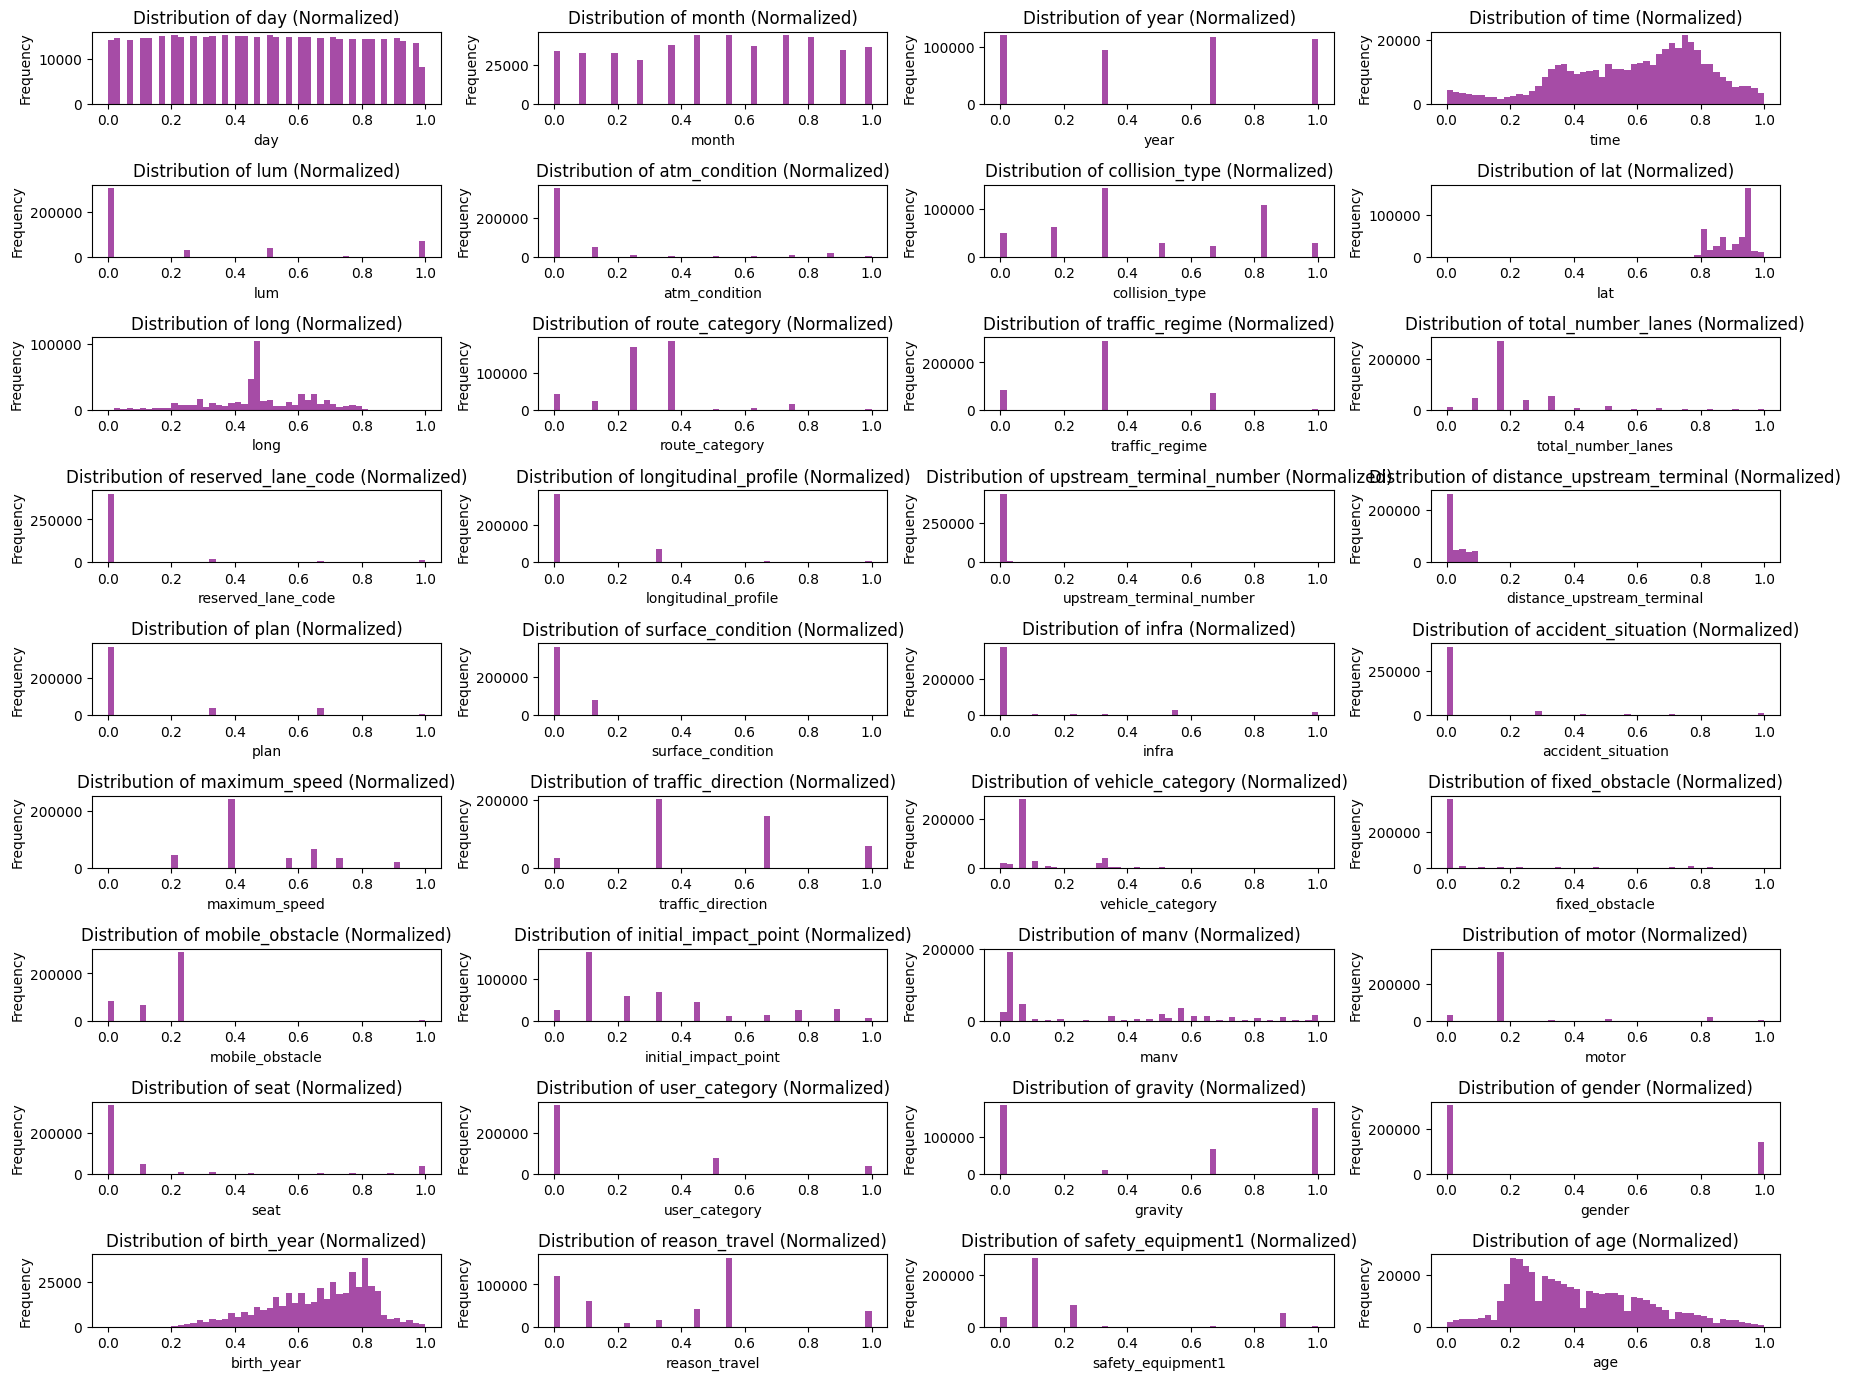

In [17]:
# Extracting all numeric columns from the dataset for normalization
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Applying Min-Max normalization to all numeric columns
min_max_scaler = MinMaxScaler()
normalized_data_all = min_max_scaler.fit_transform(data[numeric_columns])

# Creating a DataFrame with the fully normalized data
normalized_df_all = pd.DataFrame(normalized_data_all, columns=numeric_columns)

# Plotting the normalized data for all numeric columns
num_columns = len(numeric_columns)
plt.figure(figsize=(18, 15))

# Creating subplots for each column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((num_columns // 4) + 1, 4, i)
    plt.hist(normalized_df_all[column], bins=50, color='purple', alpha=0.7)
    plt.title(f'Distribution of {column} (Normalized)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [18]:
# Selecting categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Initialize a dictionary to store chi-square results between 'gravity' and all other categorical variables
chi_square_results_gravity = {}

# Perform chi-square tests between 'gravity' and each categorical variable
for var in categorical_columns:
    if var != 'gravity':
        contingency_table = pd.crosstab(data['gravity'], data[var])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_square_results_gravity[var] = p

# Filter and sort significant results with p-values < 0.05
significant_chi_square_results_gravity = {k: v for k, v in chi_square_results_gravity.items() if v < 0.05}
significant_chi_square_results_gravity = sorted(significant_chi_square_results_gravity.items(), key=lambda item: item[1])

significant_chi_square_results_gravity 



[('num_veh', 0.0),
 ('vehicleID', 1.248968303719247e-309),
 ('AccID', 1.3873912875516578e-211)]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Assuming `data` is your dataframe and `gravity` is your target variable
X = data.drop('gravity', axis=1)
y = data['gravity'].astype(int)  # Ensure gravity is in numeric form if necessary

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Feature importance (coefficients)
importance = model.coef_[0]

# Print the feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v}')

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


ValueError: could not convert string to float: '792\xa0520'

In [ ]:
# Separate features into numerical and categorical
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_numerical = X[numerical_features]
X_categorical = X[categorical_features]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Convert encoded features back to DataFrame
X_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_features))


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_features)


In [ ]:
# Combine numerical and encoded categorical features
X_processed = pd.concat([X_numerical_scaled, X_categorical_encoded], axis=1)


In [ ]:
# Now split the data and train the model
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Feature importance (coefficients)
importance = model.coef_[0]

# Print the feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X_processed.columns[i]}, Score: {v}')

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
